In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import os # accessing directory structure

### Import the dataset

In [370]:
for dirname, _, filenames in os.walk('G:\\bits_ss\\Dissertation\\archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

G:\bits_ss\Dissertation\archive\final-anormal-data-set.csv
G:\bits_ss\Dissertation\archive\final-complete-data-set.csv
G:\bits_ss\Dissertation\archive\final-dataset.csv
G:\bits_ss\Dissertation\archive\final-normal-data-set.csv


In [371]:
nRowsRead = None # specify 'None' if want to read whole file
# final-anormal-data-set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('G:\\bits_ss\\Dissertation\\archive\\final-dataset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'final-dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 95312 rows and 83 columns


C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [372]:
df1.head(5)

,cpu_guest,cpu_guest_nice,cpu_idle,cpu_iowait,cpu_irq,cpu_nice,cpu_softirq,cpu_steal,cpu_system,cpu_total,...,processcount_thread,processcount_total,system_hostname,system_hr_name,system_linux_distro,system_os_name,system_os_version,system_platform,timestamp,Anormal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,100.0,...,157.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,100.0,...,155.0,122.0,vm1-graph-analytics,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,28-01-2020 19:24,False


In [373]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95312 entries, 0 to 95311
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cpu_guest                      95311 non-null  float64
 1   cpu_guest_nice                 95311 non-null  float64
 2   cpu_idle                       95311 non-null  float64
 3   cpu_iowait                     95310 non-null  float64
 4   cpu_irq                        95311 non-null  float64
 5   cpu_nice                       95310 non-null  float64
 6   cpu_softirq                    95310 non-null  float64
 7   cpu_steal                      95311 non-null  float64
 8   cpu_system                     95311 non-null  float64
 9   cpu_total                      95310 non-null  float64
 10  cpu_user                       95311 non-null  float64
 11  diskio_sda1_disk_name          95312 non-null  object 
 12  diskio_sda1_key                95312 non-null 

### Clear the dataset and normalise

In [374]:
df1 = df1.select_dtypes(exclude=['object'])
df1 =df1[~df1.isin([np.nan, np.inf, -np.inf]).any(1)]
df1["Anormal"] = df1["Anormal"].astype(int)

In [375]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95310 entries, 0 to 95311
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cpu_guest                     95310 non-null  float64
 1   cpu_guest_nice                95310 non-null  float64
 2   cpu_idle                      95310 non-null  float64
 3   cpu_iowait                    95310 non-null  float64
 4   cpu_irq                       95310 non-null  float64
 5   cpu_nice                      95310 non-null  float64
 6   cpu_softirq                   95310 non-null  float64
 7   cpu_steal                     95310 non-null  float64
 8   cpu_system                    95310 non-null  float64
 9   cpu_total                     95310 non-null  float64
 10  cpu_user                      95310 non-null  float64
 11  diskio_sda1_read_bytes        95310 non-null  float64
 12  diskio_sda1_write_bytes       95310 non-null  int64  
 13  d

In [376]:
list(df1.columns)

['cpu_guest',
 'cpu_guest_nice',
 'cpu_idle',
 'cpu_iowait',
 'cpu_irq',
 'cpu_nice',
 'cpu_softirq',
 'cpu_steal',
 'cpu_system',
 'cpu_total',
 'cpu_user',
 'diskio_sda1_read_bytes',
 'diskio_sda1_write_bytes',
 'diskio_sda_read_bytes',
 'diskio_sda_write_bytes',
 'fs_/_free',
 'fs_/_used',
 'load_cpucore',
 'load_min1',
 'load_min15',
 'load_min5',
 'mem_active',
 'mem_available',
 'mem_buffers',
 'mem_cached',
 'mem_free',
 'mem_inactive',
 'mem_percent',
 'mem_shared',
 'mem_total',
 'mem_used',
 'memswap_free',
 'memswap_percent',
 'memswap_sin',
 'memswap_sout',
 'memswap_total',
 'memswap_used',
 'network_lo_cumulative_cx',
 'network_lo_cumulative_rx',
 'network_lo_cumulative_tx',
 'network_lo_rx',
 'network_lo_time_since_update',
 'percpu_0_cpu_number',
 'percpu_0_guest',
 'percpu_0_guest_nice',
 'percpu_0_idle',
 'percpu_0_iowait',
 'percpu_0_irq',
 'percpu_0_nice',
 'percpu_0_softirq',
 'percpu_0_steal',
 'percpu_0_system',
 'percpu_0_total',
 'percpu_0_user',
 'processcount

### Split the dataset into feature and target set

In [377]:
X = df1.copy()
X.drop(list(X.filter(regex = 'mem_')), axis = 1, inplace = True)
X.drop(list(X.filter(regex = 'memswap')), axis = 1, inplace = True)
X = X.loc[:, X.columns != 'Anormal']
y = df1["Anormal"].astype(int)

In [378]:
list(X.columns)

['cpu_guest',
 'cpu_guest_nice',
 'cpu_idle',
 'cpu_iowait',
 'cpu_irq',
 'cpu_nice',
 'cpu_softirq',
 'cpu_steal',
 'cpu_system',
 'cpu_total',
 'cpu_user',
 'diskio_sda1_read_bytes',
 'diskio_sda1_write_bytes',
 'diskio_sda_read_bytes',
 'diskio_sda_write_bytes',
 'fs_/_free',
 'fs_/_used',
 'load_cpucore',
 'load_min1',
 'load_min15',
 'load_min5',
 'network_lo_cumulative_cx',
 'network_lo_cumulative_rx',
 'network_lo_cumulative_tx',
 'network_lo_rx',
 'network_lo_time_since_update',
 'percpu_0_cpu_number',
 'percpu_0_guest',
 'percpu_0_guest_nice',
 'percpu_0_idle',
 'percpu_0_iowait',
 'percpu_0_irq',
 'percpu_0_nice',
 'percpu_0_softirq',
 'percpu_0_steal',
 'percpu_0_system',
 'percpu_0_total',
 'percpu_0_user',
 'processcount_running',
 'processcount_sleeping',
 'processcount_thread',
 'processcount_total']

### Using Logistic Regression Classifier

In [379]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [380]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [381]:
# import the metrics class
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20105,   104],
       [ 1937,  1682]], dtype=int64)

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20209
           1       0.94      0.46      0.62      3619

    accuracy                           0.91     23828
   macro avg       0.93      0.73      0.79     23828
weighted avg       0.92      0.91      0.90     23828



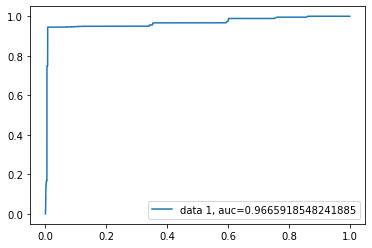

In [383]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using Decision Tree Classifier

In [384]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [385]:
y_pred = dtc.predict(X_test)

In [386]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20187    22]
 [   15  3604]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20209
           1       0.99      1.00      0.99      3619

    accuracy                           1.00     23828
   macro avg       1.00      1.00      1.00     23828
weighted avg       1.00      1.00      1.00     23828



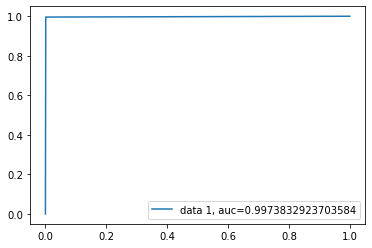

In [387]:
y_pred_proba = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using KNN Classifier

In [388]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=3)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [389]:
# Use the .predict() method to make predictions from the X_test subset
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20105,   104],
       [  116,  3503]], dtype=int64)

In [390]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20105   104]
 [  116  3503]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20209
           1       0.97      0.97      0.97      3619

    accuracy                           0.99     23828
   macro avg       0.98      0.98      0.98     23828
weighted avg       0.99      0.99      0.99     23828



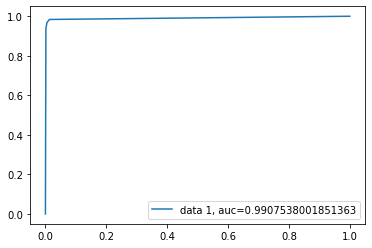

In [391]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()